In [119]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
file_path = '/content/drive/MyDrive/Pune/puneClimateData.csv'
df = pd.read_csv(file_path)
print(df.head())
file_path1 = '/content/drive/MyDrive/DSProject/climate_change_data.csv'
df1 = pd.read_csv(file_path1)
print(df1.head())
file_path2 = '/content/drive/MyDrive/DSProject/AQI2020.csv'
df2 = pd.read_csv(file_path2)
df2.head()


             date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2008-12-11 00:00:00        30        18           0.0     11.0        6   
1  2008-12-11 01:00:00        30        18           0.0     11.0        6   
2  2008-12-11 02:00:00        30        18           0.0     11.0        6   
3  2008-12-11 03:00:00        30        18           0.0     11.0        6   
4  2008-12-11 04:00:00        30        18           0.0     11.0        6   

   moon_illumination  moonrise   moonset   sunrise  ... WindGustKmph  \
0                 93  04:33 PM  05:13 AM  06:57 AM  ...           10   
1                 93  04:33 PM  05:13 AM  06:57 AM  ...            9   
2                 93  04:33 PM  05:13 AM  06:57 AM  ...            8   
3                 93  04:33 PM  05:13 AM  06:57 AM  ...            8   
4                 93  04:33 PM  05:13 AM  06:57 AM  ...            7   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0          31    

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2020-11-13 14:00:00  2020-11-13 15:00:00          28.13         47.57   
1  2020-11-13 15:00:00  2020-11-13 16:00:00          20.86         34.59   
2  2020-11-13 16:00:00  2020-11-13 17:00:00          17.59         28.70   
3  2020-11-13 17:00:00  2020-11-13 18:00:00          26.48         44.58   
4  2020-11-13 18:00:00  2020-11-13 19:00:00          27.52         46.49   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  CO (mg/m3)  Ozone (ug/m3)  \
0        5.12        12.61      17.74         NaN          20.75   
1        5.18        12.08      17.26         NaN          23.25   
2        5.12        12.13      17.26         NaN          21.50   
3        5.21        14.08      19.30         NaN          19.25   
4        5.35        22.47      27.82         NaN          11.00   

   Benzene (ug/m3)  Toluene (ug/m3)  Eth-Benzene (ug/m3)  MP-Xylene (ug/m3)  \
0             1.62              NaN                  NaN               1.31   
1             1.43              NaN                  NaN               1.26   
2             1.44              NaN                  NaN               1.21   
3             1.18              NaN                  NaN               1.18   
4             1.17              NaN                  NaN               1.16   

   Xylene (ug/m3)  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [123]:
print(df.columns)

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')


In [124]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0 2008-12-11 00:00:00        30        18           0.0     11.0        6   
1 2008-12-11 01:00:00        30        18           0.0     11.0        6   
2 2008-12-11 02:00:00        30        18           0.0     11.0        6   
3 2008-12-11 03:00:00        30        18           0.0     11.0        6   
4 2008-12-11 04:00:00        30        18           0.0     11.0        6   

   moon_illumination  moonrise   moonset   sunrise  ... WindGustKmph  \
0                 93  04:33 PM  05:13 AM  06:57 AM  ...           10   
1                 93  04:33 PM  05:13 AM  06:57 AM  ...            9   
2                 93  04:33 PM  05:13 AM  06:57 AM  ...            8   
3                 93  04:33 PM  05:13 AM  06:57 AM  ...            8   
4                 93  04:33 PM  05:13 AM  06:57 AM  ...            7   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0          31        72       0.0      1013     18          10            114   
1          30        72       0.0      1013     19          10            125   
2          29        72       0.0      1013     18          10            136   
3          29        72       0.0      1013     18          10            147   
4          23        68       0.0      1014     20          10            136   

   windspeedKmph  location  
0              5      pune  
1              4      pune  
2              4      pune  
3              4      pune  
4              4      pune  

[5 rows x 25 columns]

In [125]:
df = df[(df['date_time'] >= '2011-01-01') & (df['date_time'] <= '2021-12-31')]
print(df['date_time'].min())
print(df['date_time'].max())


2011-01-01 00:00:00
2021-12-31 00:00:00


In [126]:
columns_to_drop = ['totalSnow_cm', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'location', 'cloudcover']
df = df.drop(columns=columns_to_drop, axis=1)
print(df.head())

                date_time  maxtempC  mintempC  sunHour  uvIndex  DewPointC  \
18024 2011-01-01 00:00:00        27        15     11.0        6          9   
18025 2011-01-01 01:00:00        27        15     11.0        6          9   
18026 2011-01-01 02:00:00        27        15     11.0        6          9   
18027 2011-01-01 03:00:00        27        15     11.0        6          9   
18028 2011-01-01 04:00:00        27        15     11.0        6         10   

       FeelsLikeC  HeatIndexC  WindChillC  WindGustKmph  humidity  precipMM  \
18024          15          15          15             8        64       0.0   
18025          15          15          15             9        65       0.0   
18026          15          15          15            11        67       0.0   
18027          15          15          15            12        68       0.0   
18028          15          15          15            10        65       0.0   

       pressure  tempC  visibility  winddirDegree  winds

In [127]:
null_values = df.isnull().sum()
print(null_values)


date_time        0
maxtempC         0
mintempC         0
sunHour          0
uvIndex          0
DewPointC        0
FeelsLikeC       0
HeatIndexC       0
WindChillC       0
WindGustKmph     0
humidity         0
precipMM         0
pressure         0
tempC            0
visibility       0
winddirDegree    0
windspeedKmph    0
dtype: int64


In [128]:
summary_stats = df.describe()
print(summary_stats)

           maxtempC      mintempC       sunHour       uvIndex     DewPointC  \
count  96409.000000  96409.000000  96409.000000  96409.000000  96409.000000   
mean      31.071176     21.062951     11.138286      6.226276     15.119076   
std        4.262130      2.659849      0.998123      0.916663      6.031814   
min       21.000000     12.000000      8.300000      4.000000    -12.000000   
25%       28.000000     19.000000     10.500000      6.000000     10.000000   
50%       30.000000     22.000000     11.000000      6.000000     16.000000   
75%       34.000000     23.000000     11.900000      7.000000     21.000000   
max       43.000000     28.000000     13.500000      8.000000     24.000000   

         FeelsLikeC    HeatIndexC    WindChillC  WindGustKmph      humidity  \
count  96409.000000  96409.000000  96409.000000  96409.000000  96409.000000   
mean      26.239698     26.424079     25.367808     17.821687     57.019023   
std        4.452904      4.303321      4.620153    

In [129]:
df.set_index('date_time', inplace=True)
df_daily = df.resample('D').mean()
df_daily.reset_index(inplace=True)
print(df_daily.head())

   date_time  maxtempC  mintempC  sunHour  uvIndex  DewPointC  FeelsLikeC  \
0 2011-01-01      27.0      15.0     11.0      6.0  11.250000   20.666667   
1 2011-01-02      28.0      15.0     11.0      6.0  11.791667   21.208333   
2 2011-01-03      29.0      16.0     11.0      6.0  12.458333   22.291667   
3 2011-01-04      28.0      17.0     11.0      6.0  12.958333   22.958333   
4 2011-01-05      28.0      18.0     11.0      6.0  11.958333   22.583333   

   HeatIndexC  WindChillC  WindGustKmph   humidity  precipMM     pressure  \
0   20.750000   20.416667     12.000000  55.041667       0.0  1009.708333   
1   21.333333   20.916667     14.250000  53.375000       0.0  1009.958333   
2   22.541667   21.958333     16.333333  54.000000       0.0  1011.125000   
3   22.958333   22.375000     13.875000  54.541667       0.0  1011.791667   
4   22.916667   22.333333     12.916667  50.833333       0.0  1011.375000   

       tempC  visibility  winddirDegree  windspeedKmph  
0  20.416667     

In [130]:

num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 96409


In [131]:
numerical_columns = ['maxtempC', 'mintempC', 'humidity', 'tempC', 'windspeedKmph','precipMM']
scaler = MinMaxScaler()
df_daily[numerical_columns] = scaler.fit_transform(df_daily[numerical_columns])
print(df_daily.head())

   date_time  maxtempC  mintempC  sunHour  uvIndex  DewPointC  FeelsLikeC  \
0 2011-01-01  0.272727    0.1875     11.0      6.0  11.250000   20.666667   
1 2011-01-02  0.318182    0.1875     11.0      6.0  11.791667   21.208333   
2 2011-01-03  0.363636    0.2500     11.0      6.0  12.458333   22.291667   
3 2011-01-04  0.318182    0.3125     11.0      6.0  12.958333   22.958333   
4 2011-01-05  0.318182    0.3750     11.0      6.0  11.958333   22.583333   

   HeatIndexC  WindChillC  WindGustKmph  humidity  precipMM     pressure  \
0   20.750000   20.416667     12.000000  0.526829       0.0  1009.708333   
1   21.333333   20.916667     14.250000  0.507317       0.0  1009.958333   
2   22.541667   21.958333     16.333333  0.514634       0.0  1011.125000   
3   22.958333   22.375000     13.875000  0.520976       0.0  1011.791667   
4   22.916667   22.333333     12.916667  0.477561       0.0  1011.375000   

      tempC  visibility  winddirDegree  windspeedKmph  
0  0.129534        10.0 

In [132]:
df_daily['date_time'] = pd.to_datetime(df_daily['date_time'])
train_set = df_daily[df_daily['date_time'].dt.year <= 2018]
test_set = df_daily[(df_daily['date_time'].dt.year >= 2019) & (df_daily['date_time'].dt.year <= 2021)]
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)
print("Training Set:")
print(train_set.head())

print("\nTesting Set:")
print(test_set.head())


Training Set:
   date_time  maxtempC  mintempC  sunHour  uvIndex  DewPointC  FeelsLikeC  \
0 2011-01-01  0.272727    0.1875     11.0      6.0  11.250000   20.666667   
1 2011-01-02  0.318182    0.1875     11.0      6.0  11.791667   21.208333   
2 2011-01-03  0.363636    0.2500     11.0      6.0  12.458333   22.291667   
3 2011-01-04  0.318182    0.3125     11.0      6.0  12.958333   22.958333   
4 2011-01-05  0.318182    0.3750     11.0      6.0  11.958333   22.583333   

   HeatIndexC  WindChillC  WindGustKmph  humidity  precipMM     pressure  \
0   20.750000   20.416667     12.000000  0.526829       0.0  1009.708333   
1   21.333333   20.916667     14.250000  0.507317       0.0  1009.958333   
2   22.541667   21.958333     16.333333  0.514634       0.0  1011.125000   
3   22.958333   22.375000     13.875000  0.520976       0.0  1011.791667   
4   22.916667   22.333333     12.916667  0.477561       0.0  1011.375000   

      tempC  visibility  winddirDegree  windspeedKmph  
0  0.12953

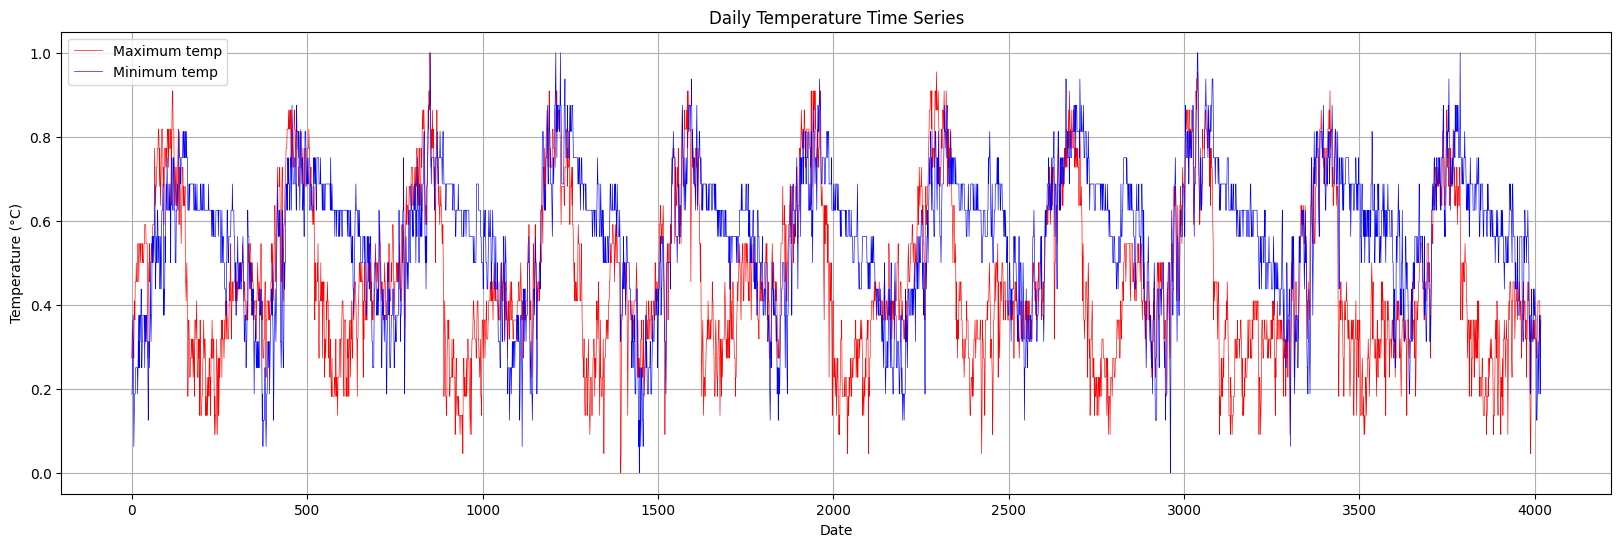

In [133]:
plt.figure(figsize=(20, 6))
plt.plot(df_daily['maxtempC'], linewidth=0.45, label='Maximum temp', color="red")
plt.plot(df_daily['mintempC'], linewidth=0.45, label='Minimum temp', color="blue")

plt.title("Daily Temperature Time Series")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

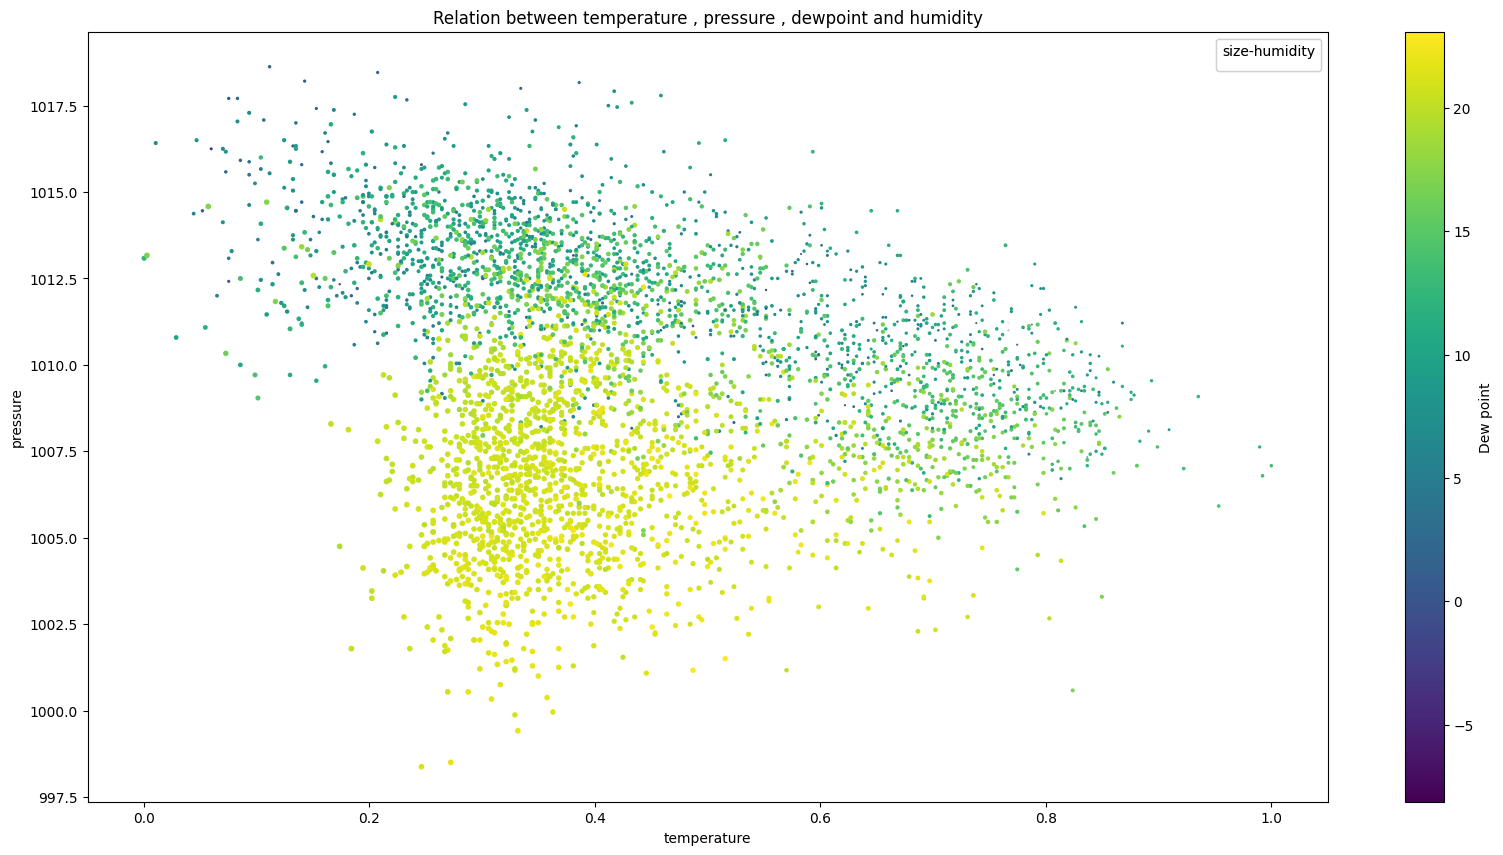

In [134]:
fig, ax = plt.subplots(figsize=(20, 10))
scattr = ax.scatter(df_daily['tempC'], df_daily['pressure'],c=df_daily['DewPointC'],s=df_daily['humidity']*10,cmap='viridis')
cbar = plt.colorbar(scattr)
cbar.set_label('Dew point')
ax.set_xlabel('temperature')
ax.set_ylabel('pressure')
legend1 = ax.legend(title="size-humidity", loc="upper right")
ax.add_artist(legend1)
ax.set_title('Relation between temperature , pressure , dewpoint and humidity')
plt.show()

In [135]:
X_train = train_set.drop(columns=['tempC', 'date_time'])
y_train = train_set['tempC']
X_test = test_set.drop(columns=['tempC', 'date_time'])
y_test = test_set['tempC']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)

[0.20537902 0.33465617 0.38638535 ... 0.18142309 0.18168103 0.10387999]


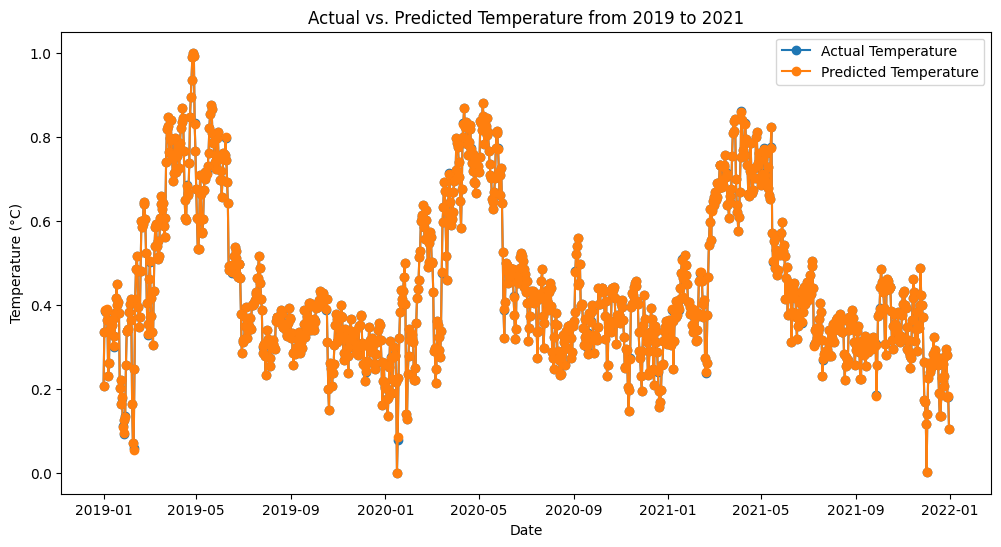

In [136]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predictions_df['date_time'] = test_set['date_time']
predictions_df = predictions_df[predictions_df['date_time'].dt.year.between(2019, 2021)]
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['date_time'], predictions_df['Actual'], label='Actual Temperature', marker='o')
plt.plot(predictions_df['date_time'], predictions_df['Predicted'], label='Predicted Temperature', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature from 2019 to 2021')
plt.legend()
plt.show()


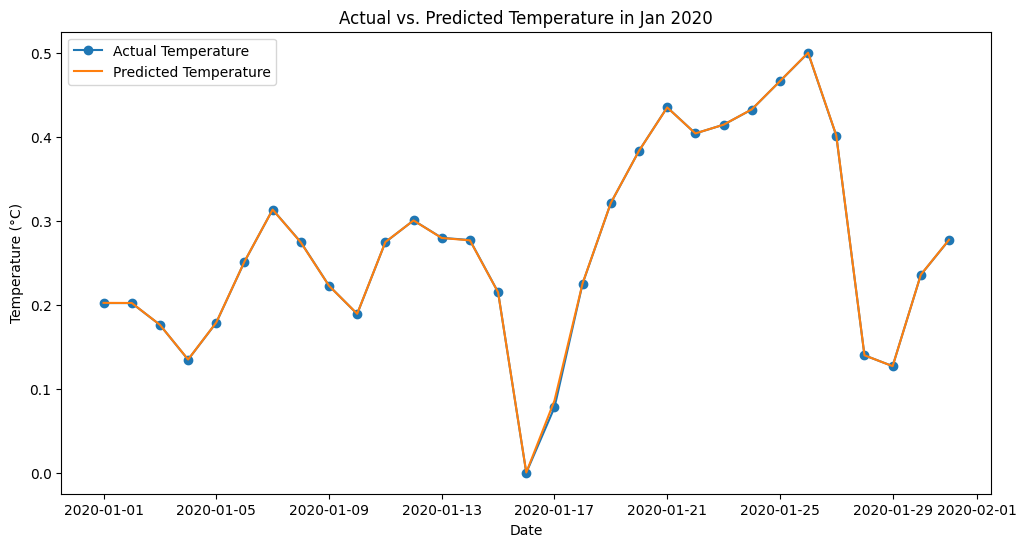

In [137]:
predictions_df['date_time'] = pd.to_datetime(predictions_df['date_time'])
jan_2020_data = predictions_df[predictions_df['date_time'].between('2020-01-01', '2020-01-31')]
plt.figure(figsize=(12, 6))
plt.plot(jan_2020_data['date_time'], jan_2020_data['Actual'], label='Actual Temperature', marker='o')
plt.plot(jan_2020_data['date_time'], jan_2020_data['Predicted'], label='Predicted Temperature', )
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature in Jan 2020')
plt.legend()
plt.show()

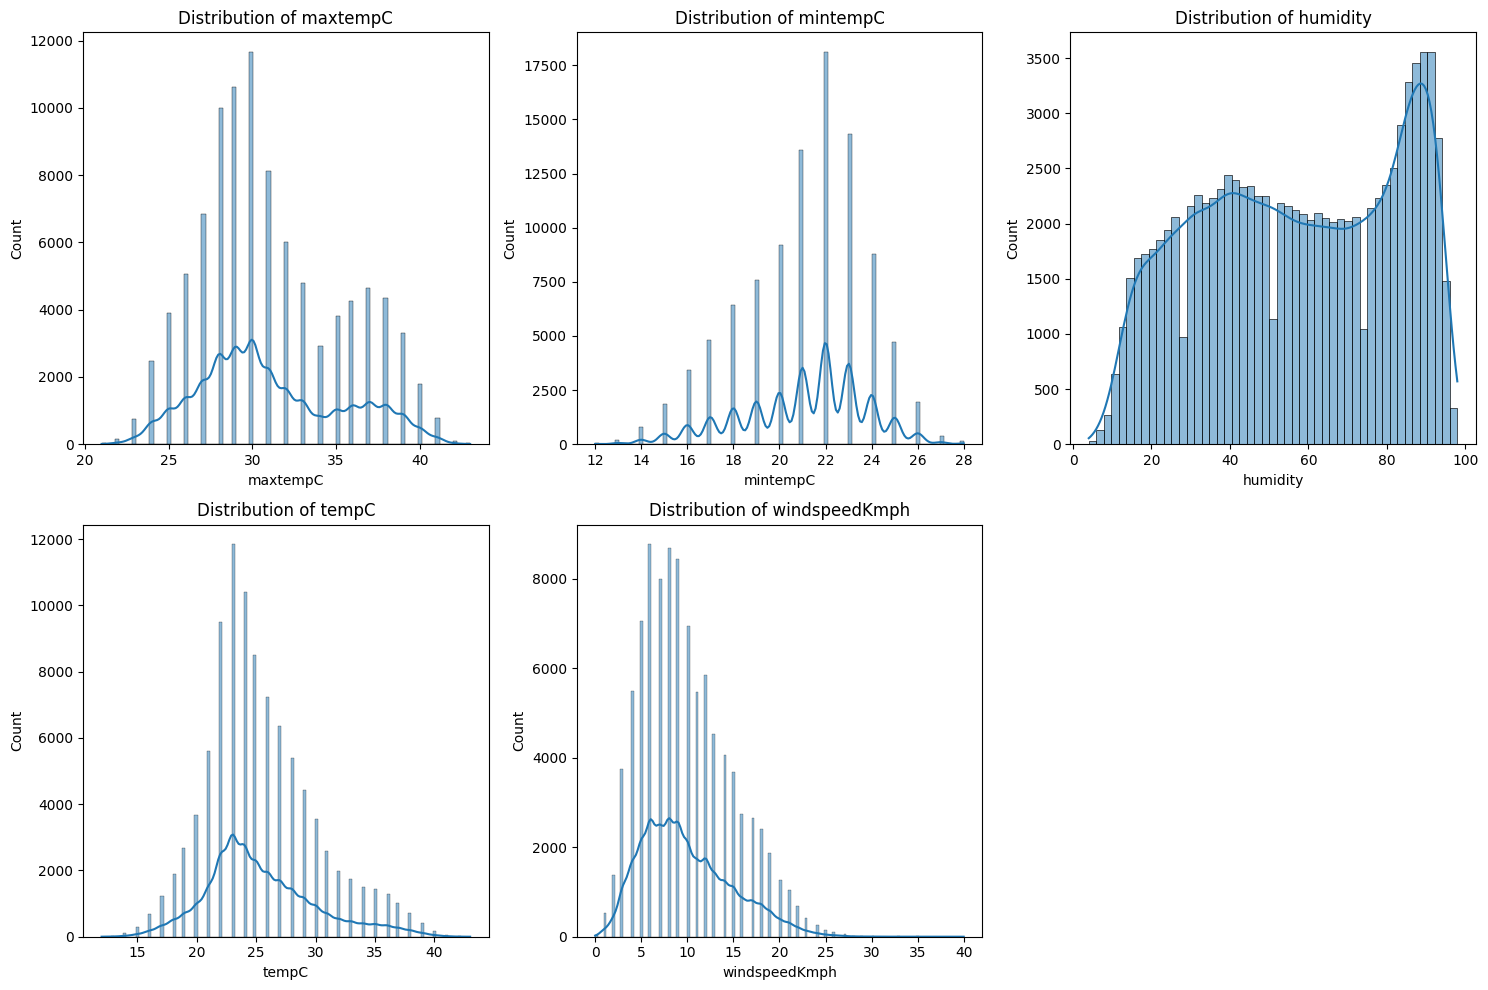

In [138]:
selected_columns = ['maxtempC', 'mintempC', 'humidity', 'tempC', 'windspeedKmph']

plt.figure(figsize=(15, 10))
for column in selected_columns:
    plt.subplot(2, 3, selected_columns.index(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


               maxtempC  mintempC   sunHour   uvIndex  DewPointC  FeelsLikeC  \
maxtempC       1.000000  0.388726  0.740540  0.876147  -0.398669    0.455540   
mintempC       0.388726  1.000000  0.253872  0.367760   0.468068    0.588068   
sunHour        0.740540  0.253872  1.000000  0.709164  -0.287712    0.341605   
uvIndex        0.876147  0.367760  0.709164  1.000000  -0.357065    0.417593   
DewPointC     -0.398669  0.468068 -0.287712 -0.357065   1.000000    0.080380   
FeelsLikeC     0.455540  0.588068  0.341605  0.417593   0.080380    1.000000   
HeatIndexC     0.449412  0.593814  0.330216  0.411548   0.090789    0.988978   
WindChillC     0.537883  0.458390  0.389976  0.488676  -0.159181    0.951435   
WindGustKmph  -0.281041  0.243458 -0.181862 -0.295074   0.303632    0.299934   
humidity      -0.630122  0.160366 -0.489640 -0.585102   0.842362   -0.356807   
precipMM      -0.312910  0.112669 -0.302220 -0.291649   0.286001    0.007597   
pressure       0.151755 -0.587812  0.128

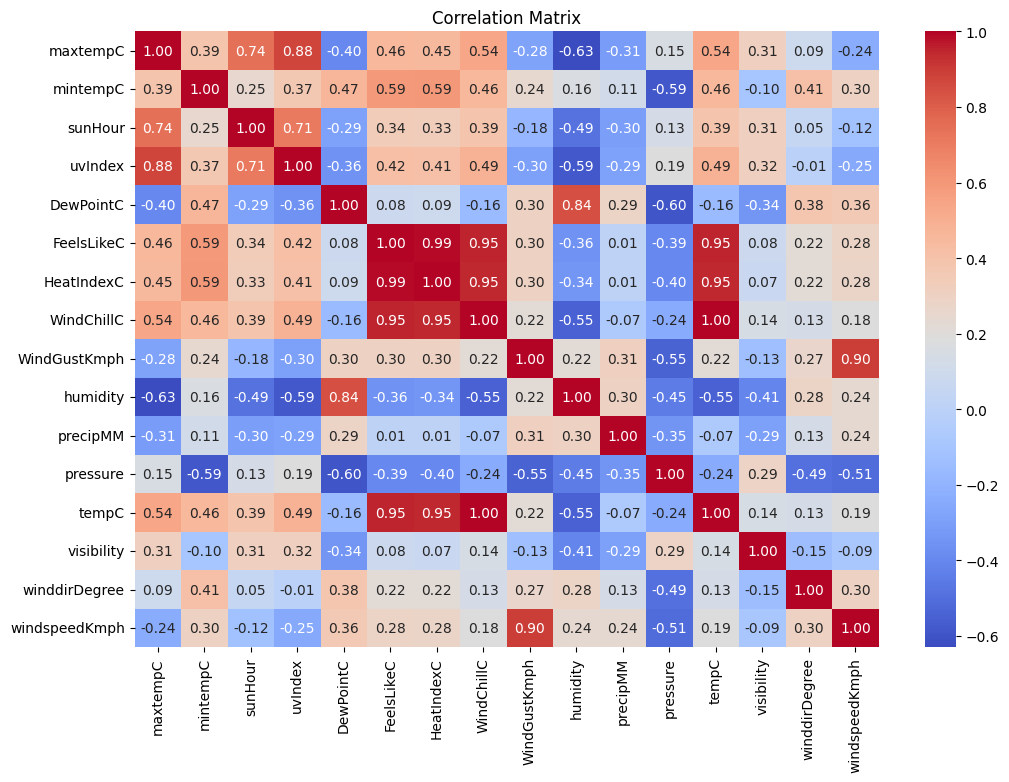

In [139]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [140]:
features = ['maxtempC', 'mintempC', 'humidity', 'windspeedKmph']
target = 'tempC'
X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")

evaluate_model(linear_reg_predictions, "Linear Regression")
evaluate_model(decision_tree_predictions, "Decision Tree")
evaluate_model(random_forest_predictions, "Random Forest")

Linear Regression Evaluation:
Mean Squared Error: 0.0008590534466707475
Mean Absolute Error: 0.02239170082366079
Root Mean Squared Error: 0.029309613553759925
R-squared: 0.973652608536071

Decision Tree Evaluation:
Mean Squared Error: 0.0013623485801705745
Mean Absolute Error: 0.0285517756514504
Root Mean Squared Error: 0.036910006504613006
R-squared: 0.95821641657898

Random Forest Evaluation:
Mean Squared Error: 0.0010084636249236497
Mean Absolute Error: 0.023735415642373584
Root Mean Squared Error: 0.03175631629965368
R-squared: 0.9690701597136133



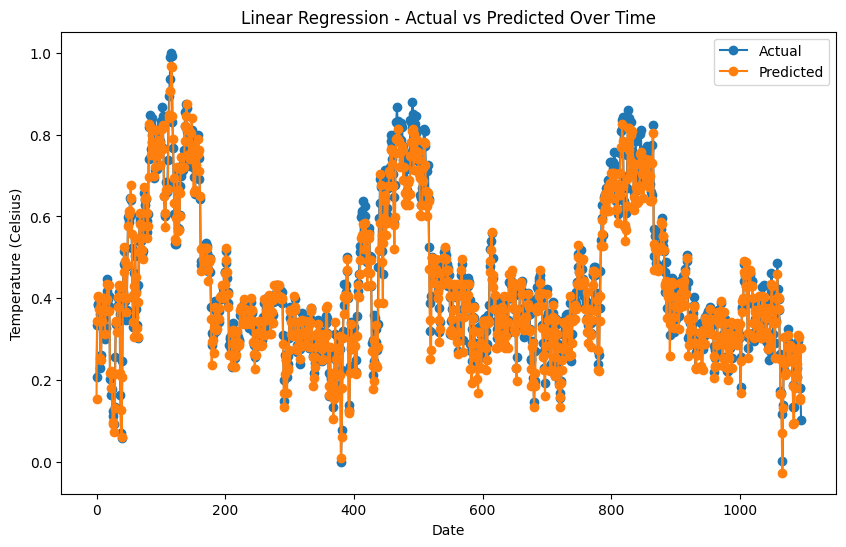

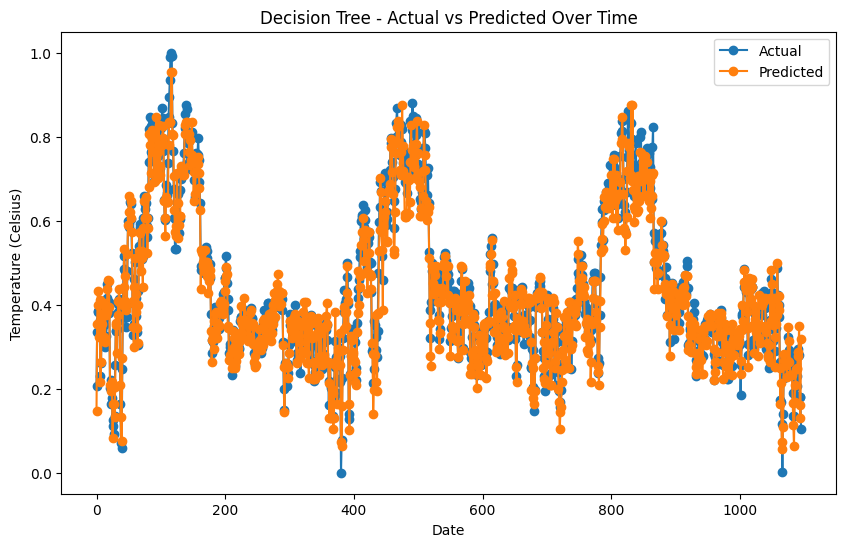

In [141]:
def plot_predictions_over_time(actual, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual, label='Actual', marker='o')
    plt.plot(actual.index, predictions, label='Predicted', marker='o')
    plt.xlabel("Date")
    plt.ylabel("Temperature (Celsius)")
    plt.title(f"{model_name} - Actual vs Predicted Over Time")
    plt.legend()
    plt.show()

# Add the following lines after the evaluate_model calls
plot_predictions_over_time(y_test, linear_reg_predictions, "Linear Regression")
plot_predictions_over_time(y_test, decision_tree_predictions, "Decision Tree")
plot_predictions_over_time(y_test, random_forest_predictions, "Random Forest")


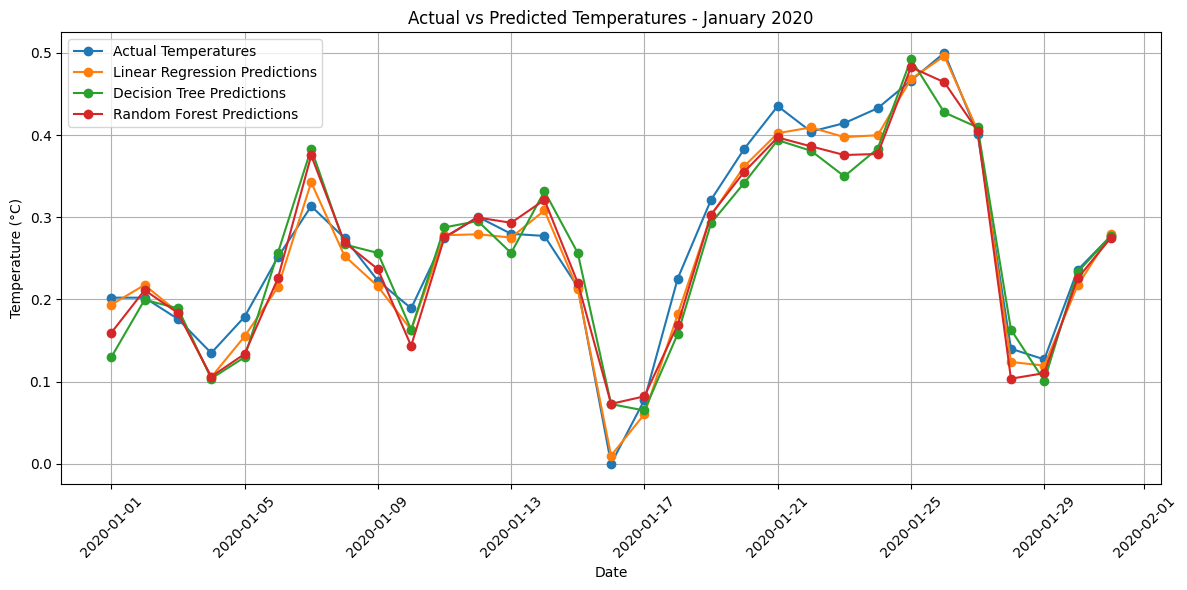

In [142]:
january_2020_data = test_set[(test_set['date_time'] >= '2020-01-01') & (test_set['date_time'] <= '2020-01-31')]

actual_temperatures = january_2020_data['tempC']
dates = january_2020_data['date_time']

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_temperatures, label='Actual Temperatures', marker='o')

plt.plot(dates, linear_reg_predictions[january_2020_data.index], label='Linear Regression Predictions', marker='o')
plt.plot(dates, decision_tree_predictions[january_2020_data.index], label='Decision Tree Predictions', marker='o')
plt.plot(dates, random_forest_predictions[january_2020_data.index], label='Random Forest Predictions', marker='o')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperatures - January 2020')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

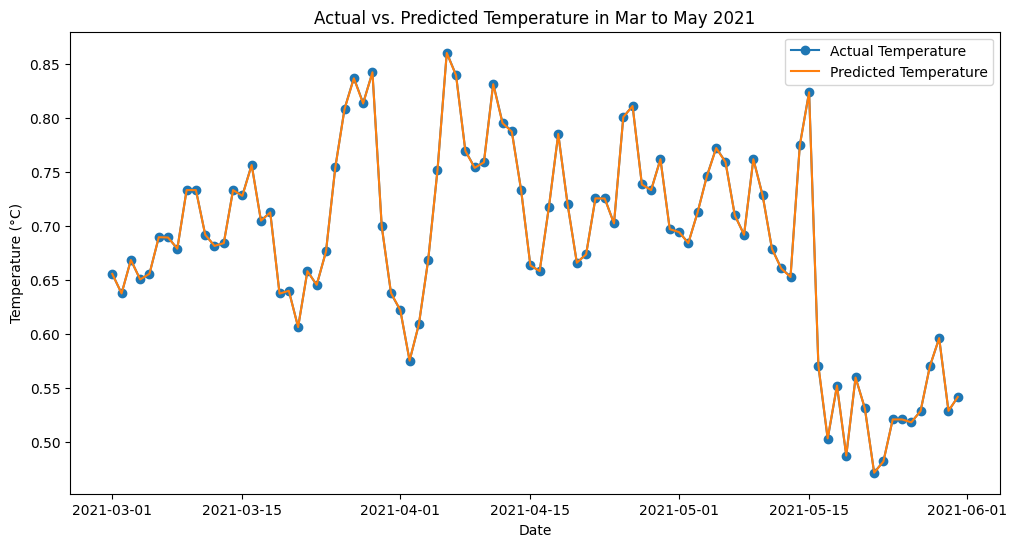

In [150]:
predictions_df['date_time'] = pd.to_datetime(predictions_df['date_time'])

jan_2020_data = predictions_df[predictions_df['date_time'].between('2021-03-01', '2021-05-31')]

plt.figure(figsize=(12, 6))
plt.plot(jan_2020_data['date_time'], jan_2020_data['Actual'], label='Actual Temperature', marker='o')
plt.plot(jan_2020_data['date_time'], jan_2020_data['Predicted'], label='Predicted Temperature', )
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature in Mar to May 2021')
plt.legend()
plt.show()

In [152]:
df2['From Date'] = pd.to_datetime(df2['From Date'])
df2.head()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0 2020-11-13 14:00:00  2020-11-13 15:00:00          28.13         47.57   
1 2020-11-13 15:00:00  2020-11-13 16:00:00          20.86         34.59   
2 2020-11-13 16:00:00  2020-11-13 17:00:00          17.59         28.70   
3 2020-11-13 17:00:00  2020-11-13 18:00:00          26.48         44.58   
4 2020-11-13 18:00:00  2020-11-13 19:00:00          27.52         46.49   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  CO (mg/m3)  Ozone (ug/m3)  \
0        5.12        12.61      17.74         NaN          20.75   
1        5.18        12.08      17.26         NaN          23.25   
2        5.12        12.13      17.26         NaN          21.50   
3        5.21        14.08      19.30         NaN          19.25   
4        5.35        22.47      27.82         NaN          11.00   

   Benzene (ug/m3)  Toluene (ug/m3)  Eth-Benzene (ug/m3)  MP-Xylene (ug/m3)  \
0             1.62              NaN                  NaN               1.31   
1             1.43              NaN                  NaN               1.26   
2             1.44              NaN                  NaN               1.21   
3             1.18              NaN                  NaN               1.18   
4             1.17              NaN                  NaN               1.16   

   Xylene (ug/m3)  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [153]:
df2.set_index('From Date', inplace=True)
df2_daily = df2.resample('D').mean()
df2_daily.reset_index(inplace=True)
print(df2_daily.head())

   From Date  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  \
0 2020-11-13      59.370000    103.611000   18.197000    27.789000  45.990000   
1 2020-11-14      77.268333    135.232500   11.669583    18.745000  30.387083   
2 2020-11-15      93.852500    164.884167    9.415000    18.295417  27.712083   
3 2020-11-16      59.921905    104.515238    9.245238    15.297143  24.525238   
4 2020-11-17            NaN           NaN         NaN          NaN        NaN   

   CO (mg/m3)  Ozone (ug/m3)  Benzene (ug/m3)  Toluene (ug/m3)  \
0         NaN      11.592000         2.262000              NaN   
1         NaN      11.666667         2.610833              NaN   
2         NaN      13.208333         2.355000              NaN   
3         NaN      14.309524         2.555238              NaN   
4         NaN            NaN              NaN              NaN   

   Eth-Benzene (ug/m3)  MP-Xylene (ug/m3)  Xylene (ug/m3)  
0                  NaN           1.271000             Na

<ipython-input-153-dcae155679ee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_daily = df2.resample('D').mean()


In [154]:
df2_daily['From Date'] = pd.to_datetime(df2_daily['From Date'])
df2_daily.set_index('From Date', inplace=True)
df_daily_filtered = df2_daily[(df2_daily.index.year >= 2020) & (df2_daily.index.year <= 2021)]
plt.figure(figsize=(10, 6))
plt.plot(df_daily_filtered['PM2.5 (ug/m3)'], label='PM2.5 (ug/m3)')
plt.plot(df_daily_filtered['PM10 (ug/m3)'], label='PM10 (ug/m3)')

plt.title('PM2.5 and PM10 Time Series (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Concentration (ug/m3)')
plt.legend()
plt.grid(True)

plt.show()

In [155]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [80]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.head()

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
4 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   

   CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
0     403.118903        0.717506      13.835237  23.631256   18.492026  
1     396.663499        1.205715      40.974084  43.982946   34.249300  
2     451.553155       -0.160783      42.697931  96.652600   34.124261  
3     422.404983       -0.475931       5.193341  47.467938    8.554563  
4     410.472999        1.135757      78.695280  61.789672    8.001164

In [81]:
df1.sort_values('Date', ascending=True)


Date           Location                Country  \
0    2000-01-01 00:00:00.000000000    New Williamtown                 Latvia   
1    2000-01-01 20:09:43.258325832       North Rachel           South Africa   
2    2000-01-02 16:19:26.516651665   West Williamland          French Guiana   
3    2000-01-03 12:29:09.774977497        South David                Vietnam   
4    2000-01-04 08:38:53.033303330     New Scottburgh                Moldova   
...                            ...                ...                    ...   
9995 2022-12-27 15:21:06.966696576   South Elaineberg                 Bhutan   
9996 2022-12-28 11:30:50.225022464       Leblancville                  Congo   
9997 2022-12-29 07:40:33.483348224     West Stephanie              Argentina   
9998 2022-12-30 03:50:16.741674112        Port Steven                Albania   
9999 2022-12-31 00:00:00.000000000  West Anthonyburgh  Sao Tome and Principe   

      Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0       10.688986     403.118903        0.717506      13.835237  23.631256   
1       13.814430     396.663499        1.205715      40.974084  43.982946   
2       27.323718     451.553155       -0.160783      42.697931  96.652600   
3       12.309581     422.404983       -0.475931       5.193341  47.467938   
4       13.210885     410.472999        1.135757      78.695280  61.789672   
...           ...            ...             ...            ...        ...   
9995    15.020523     391.379537       -1.452243      93.417109  25.293814   
9996    16.772451     346.921190        0.543616      49.882947  96.787402   
9997    22.370025     466.042136        1.026704      30.659841  15.211825   
9998    19.430853     337.899776       -0.895329      18.932275  82.774520   
9999    12.661928     381.172746        2.260788      78.339658  99.243923   

      Wind Speed  
0      18.492026  
1      34.249300  
2      34.124261  
3       8.554563  
4       8.001164  
...          ...  
9995    6.531866  
9996   42.249014  
9997   18.293708  
9998   42.424255  
9999   41.856539  

[10000 rows x 9 columns]

In [82]:
print(df1.columns)

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')


In [83]:
df1[['Date','Country']].sort_values('Country', ascending=True)


Date      Country
1487 2003-06-03 04:55:05.130513040  Afghanistan
9467 2021-10-10 01:48:26.570657024  Afghanistan
2360 2005-06-05 14:21:29.648964896  Afghanistan
9616 2022-02-12 05:56:52.061206016  Afghanistan
5970 2013-09-24 07:14:12.205220480  Afghanistan
...                            ...          ...
8230 2018-12-05 21:23:36.021602176     Zimbabwe
3371 2007-10-02 22:09:23.816381632     Zimbabwe
9613 2022-02-09 17:27:42.286228608     Zimbabwe
364  2000-11-01 18:58:26.030603060     Zimbabwe
9516 2021-11-20 05:44:46.228622848     Zimbabwe

[10000 rows x 2 columns]

In [84]:
null_values = df1.isnull().sum()
print(null_values)

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


In [85]:
summary_stats = df1.describe()
print(summary_stats)

        Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664  


In [86]:
df1 = df1.drop(['Location'], axis = 1)

In [87]:
df_India = df1[(df1['Country'] == 'India')]
df_India.head()

Date Country  Temperature  CO2 Emissions  \
44  2000-02-06 23:07:43.366336633   India    13.863784     408.121863   
153 2000-05-08 12:47:18.523852384   India    14.563792     441.458510   
420 2000-12-18 20:02:48.496849684   India     8.050407     352.500027   
604 2001-05-22 09:51:28.028802880   India    12.435437     380.040060   
626 2001-06-09 21:25:19.711971192   India    19.580143     412.246774   

     Sea Level Rise  Precipitation   Humidity  Wind Speed  
44        -0.078811      77.498661  31.356005   26.264121  
153        0.012392      72.783893  64.897858   44.925654  
420       -1.081892      85.429837  90.573097   33.954562  
604       -0.376124      92.218718   7.455810   41.320736  
626        1.490122      55.683053  63.584592   44.651892

In [88]:
df_India[['Date','Temperature','CO2 Emissions']].sort_values('Date', ascending=True)
df_India.head()

Date Country  Temperature  CO2 Emissions  \
44  2000-02-06 23:07:43.366336633   India    13.863784     408.121863   
153 2000-05-08 12:47:18.523852384   India    14.563792     441.458510   
420 2000-12-18 20:02:48.496849684   India     8.050407     352.500027   
604 2001-05-22 09:51:28.028802880   India    12.435437     380.040060   
626 2001-06-09 21:25:19.711971192   India    19.580143     412.246774   

     Sea Level Rise  Precipitation   Humidity  Wind Speed  
44        -0.078811      77.498661  31.356005   26.264121  
153        0.012392      72.783893  64.897858   44.925654  
420       -1.081892      85.429837  90.573097   33.954562  
604       -0.376124      92.218718   7.455810   41.320736  
626        1.490122      55.683053  63.584592   44.651892

In [89]:
num_rows = df1.shape[0]
print(num_rows)

10000


In [91]:
sns.pairplot(df1[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']])
plt.show()

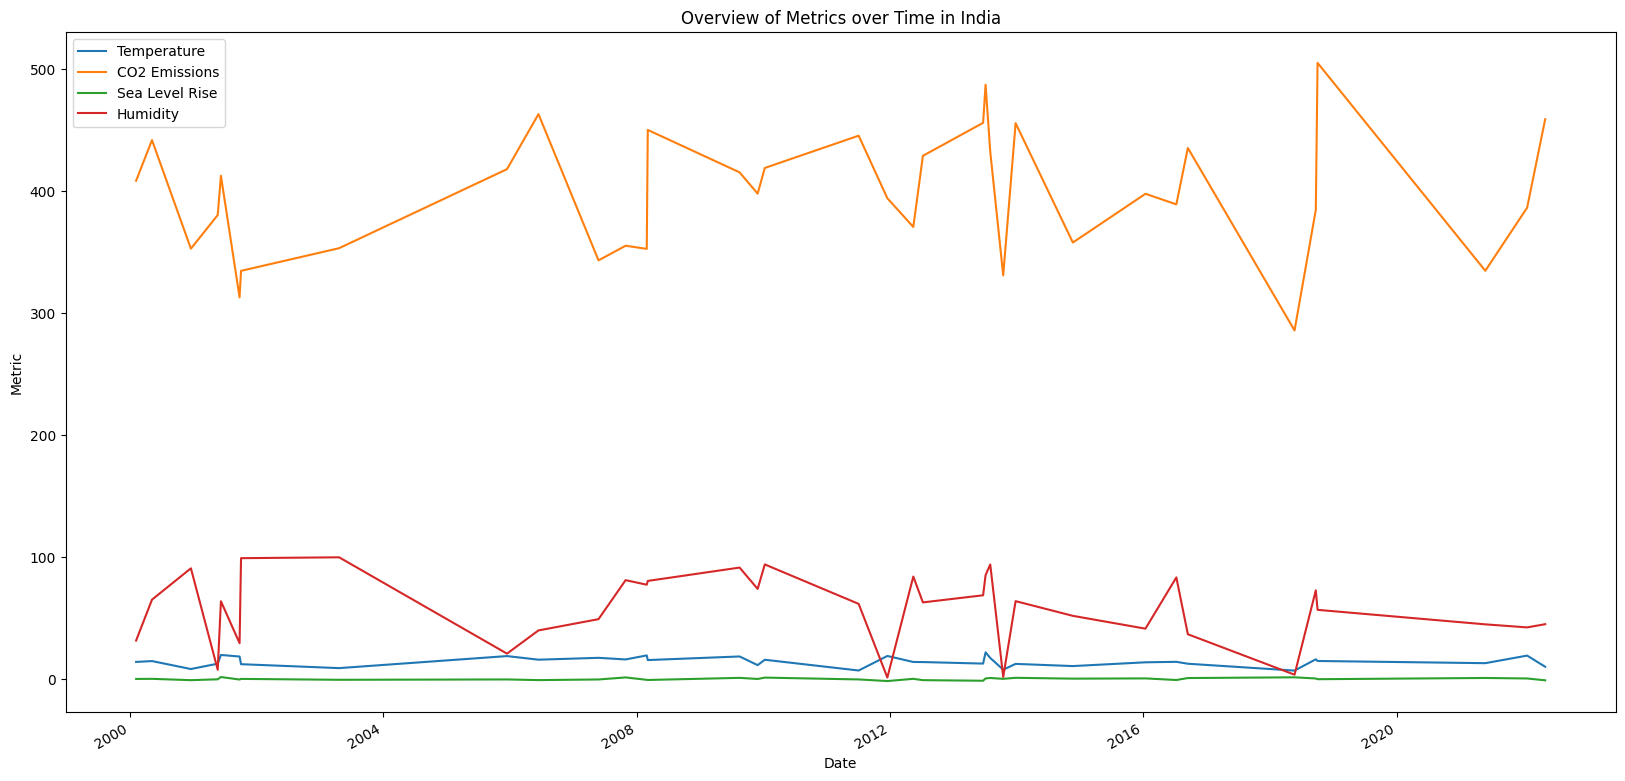

In [92]:
plot_india = df_India[['Date', 'Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity']] \
    .sort_values('Date', ascending=True)
plot_india.set_index('Date', inplace=True)

plot_india.plot(kind='line', figsize=(20, 10))

plt.xlabel('Date')
plt.ylabel('Metric')
plt.title('Overview of Metrics over Time in India')
plt.legend(loc='upper left')
plt.show()